# Восстановление золота из руды

Подготовьте прототип модели машинного обучения для «Цифры». Компания разрабатывает решения для эффективной работы промышленных предприятий.

Модель должна предсказать коэффициент восстановления золота из золотосодержащей руды. Используйте данные с параметрами добычи и очистки. 

Модель поможет оптимизировать производство, чтобы не запускать предприятие с убыточными характеристиками.

Вам нужно:

1. Подготовить данные;
2. Провести исследовательский анализ данных;
3. Построить и обучить модель.

Чтобы выполнить проект, обращайтесь к библиотекам *pandas*, *matplotlib* и *sklearn.* Вам поможет их документация.

**Цель работы:** подготовить прототип модели машинного обучения, которая должна должна предсказать коэффициент восстановления золота из золотосодержащей руды. 

**Ход работы:**
1. Подготовка данных:
    * Открытие и изучение файлов;
    * Проверка правильности расчета эффективности обогащения;
    * Анализ признаков, недоступных в тестовой выборке;
    * Предобработка данных;
2. Анализ данных:
    * Изменение концентрации металлов на различных этапах очистки;
    * Сравнение распределения размеров гранул сырья на обучающей и тестовой выборках;
    * Исследование суммарной концентрации всех веществ на различных этапах;
3. Выбор и обучение модели.

**Наименование признаков**

`[этап].[тип_параметра].[название_параметра]`

Пример: `rougher.input.feed_ag`

Возможные значения для блока `[этап]`:
* rougher — флотация
* primary_cleaner — первичная очистка
* secondary_cleaner — вторичная очистка
* final — финальные характеристики

Возможные значения для блока `[тип_параметра]`:
* input — параметры сырья
* output — параметры продукта
* state — параметры, характеризующие текущее состояние этапа
* calculation — расчётные характеристики

## Подготовка данных

### Открытие и изучение файлов

Импортируем необходимые в работе библиотеки.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.metrics import mean_squared_error, make_scorer
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RandomizedSearchCV
from catboost import CatBoostRegressor
from sklearn.dummy import DummyRegressor

Напишем функцию для чтения файла, вывода первых 5 строк и информации на экран, а также для подсчета количества дубликатов.

In [2]:
def read_info(file):
    data = pd.read_csv(file, index_col='date')
    #вывод первых 5 строк на экран
    display(data.head())
    #вывод информации о файле
    print(data.info())
    #вывод количества дубликатов
    print('Количество дубликатов:', data.duplicated().sum())
    return data

Изучим файл с исходными данными.

In [3]:
data_full = read_info('/datasets/gold_recovery_full_new.csv')

,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.concentrate_au,final.output.recovery,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol,final.output.tail_au,primary_cleaner.input.sulfate,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
date,,,,,,,,,,,,,,,,,,,,,
2016-01-15 00:00:00,6.055403,9.889648,5.507324,42.192020,70.541216,10.411962,0.895447,16.904297,2.143149,127.092003,...,14.016835,-502.488007,12.099931,-504.715942,9.925633,-498.310211,8.079666,-500.470978,14.151341,-605.841980
2016-01-15 01:00:00,6.029369,9.968944,5.257781,42.701629,69.266198,10.462676,0.927452,16.634514,2.224930,125.629232,...,13.992281,-505.503262,11.950531,-501.331529,10.039245,-500.169983,7.984757,-500.582168,13.998353,-599.787184
2016-01-15 02:00:00,6.055926,10.213995,5.383759,42.657501,68.116445,10.507046,0.953716,16.208849,2.257889,123.819808,...,14.015015,-502.520901,11.912783,-501.133383,10.070913,-500.129135,8.013877,-500.517572,14.028663,-601.427363
2016-01-15 03:00:00,6.047977,9.977019,4.858634,42.689819,68.347543,10.422762,0.883763,16.532835,2.146849,122.270188,...,14.036510,-500.857308,11.999550,-501.193686,9.970366,-499.201640,7.977324,-500.255908,14.005551,-599.996129
2016-01-15 04:00:00,6.148599,10.142511,4.939416,42.774141,66.927016,10.360302,0.792826,16.525686,2.055292,117.988169,...,14.027298,-499.838632,11.953070,-501.053894,9.925709,-501.686727,7.894242,-500.356035,13.996647,-601.496691


<class 'pandas.core.frame.DataFrame'>
Index: 19439 entries, 2016-01-15 00:00:00 to 2018-08-18 10:59:59
Data columns (total 86 columns):
 #   Column                                              Non-Null Count  Dtype  
---  ------                                              --------------  -----  
 0   final.output.concentrate_ag                         19438 non-null  float64
 1   final.output.concentrate_pb                         19438 non-null  float64
 2   final.output.concentrate_sol                        19228 non-null  float64
 3   final.output.concentrate_au                         19439 non-null  float64
 4   final.output.recovery                               19439 non-null  float64
 5   final.output.tail_ag                                19438 non-null  float64
 6   final.output.tail_pb                                19338 non-null  float64
 7   final.output.tail_sol                               19433 non-null  float64
 8   final.output.tail_au                             

Файл содержит 87 признаков вместе с датой и 19439 объектов. Все наименования признаков соответствуют описанию, типы данных указаны верно, дубликаты не обнаружены, для некоторых признаков есть пропуски.

Изучим файл с обучающией выборкой.

In [4]:
data_train = read_info('/datasets/gold_recovery_train_new.csv')

,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.concentrate_au,final.output.recovery,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol,final.output.tail_au,primary_cleaner.input.sulfate,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
date,,,,,,,,,,,,,,,,,,,,,
2016-01-15 00:00:00,6.055403,9.889648,5.507324,42.192020,70.541216,10.411962,0.895447,16.904297,2.143149,127.092003,...,14.016835,-502.488007,12.099931,-504.715942,9.925633,-498.310211,8.079666,-500.470978,14.151341,-605.841980
2016-01-15 01:00:00,6.029369,9.968944,5.257781,42.701629,69.266198,10.462676,0.927452,16.634514,2.224930,125.629232,...,13.992281,-505.503262,11.950531,-501.331529,10.039245,-500.169983,7.984757,-500.582168,13.998353,-599.787184
2016-01-15 02:00:00,6.055926,10.213995,5.383759,42.657501,68.116445,10.507046,0.953716,16.208849,2.257889,123.819808,...,14.015015,-502.520901,11.912783,-501.133383,10.070913,-500.129135,8.013877,-500.517572,14.028663,-601.427363
2016-01-15 03:00:00,6.047977,9.977019,4.858634,42.689819,68.347543,10.422762,0.883763,16.532835,2.146849,122.270188,...,14.036510,-500.857308,11.999550,-501.193686,9.970366,-499.201640,7.977324,-500.255908,14.005551,-599.996129
2016-01-15 04:00:00,6.148599,10.142511,4.939416,42.774141,66.927016,10.360302,0.792826,16.525686,2.055292,117.988169,...,14.027298,-499.838632,11.953070,-501.053894,9.925709,-501.686727,7.894242,-500.356035,13.996647,-601.496691


<class 'pandas.core.frame.DataFrame'>
Index: 14149 entries, 2016-01-15 00:00:00 to 2018-08-18 10:59:59
Data columns (total 86 columns):
 #   Column                                              Non-Null Count  Dtype  
---  ------                                              --------------  -----  
 0   final.output.concentrate_ag                         14148 non-null  float64
 1   final.output.concentrate_pb                         14148 non-null  float64
 2   final.output.concentrate_sol                        13938 non-null  float64
 3   final.output.concentrate_au                         14149 non-null  float64
 4   final.output.recovery                               14149 non-null  float64
 5   final.output.tail_ag                                14149 non-null  float64
 6   final.output.tail_pb                                14049 non-null  float64
 7   final.output.tail_sol                               14144 non-null  float64
 8   final.output.tail_au                             

Файл содержит 87 признаков вместе с датой и 14149 объектов. Все наименования признаков соответствуют описанию, типы данных указаны верно, дубликаты не обнаружены, для некоторых признаков есть пропуски.

Изучим файл с тестовой выборкой.

In [5]:
data_test = read_info('/datasets/gold_recovery_test_new.csv')

,primary_cleaner.input.sulfate,primary_cleaner.input.depressant,primary_cleaner.input.feed_size,primary_cleaner.input.xanthate,primary_cleaner.state.floatbank8_a_air,primary_cleaner.state.floatbank8_a_level,primary_cleaner.state.floatbank8_b_air,primary_cleaner.state.floatbank8_b_level,primary_cleaner.state.floatbank8_c_air,primary_cleaner.state.floatbank8_c_level,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
date,,,,,,,,,,,,,,,,,,,,,
2016-09-01 00:59:59,210.800909,14.993118,8.080000,1.005021,1398.981301,-500.225577,1399.144926,-499.919735,1400.102998,-500.704369,...,12.023554,-497.795834,8.016656,-501.289139,7.946562,-432.317850,4.872511,-500.037437,26.705889,-499.709414
2016-09-01 01:59:59,215.392455,14.987471,8.080000,0.990469,1398.777912,-500.057435,1398.055362,-499.778182,1396.151033,-499.240168,...,12.058140,-498.695773,8.130979,-499.634209,7.958270,-525.839648,4.878850,-500.162375,25.019940,-499.819438
2016-09-01 02:59:59,215.259946,12.884934,7.786667,0.996043,1398.493666,-500.868360,1398.860436,-499.764529,1398.075709,-502.151509,...,11.962366,-498.767484,8.096893,-500.827423,8.071056,-500.801673,4.905125,-499.828510,24.994862,-500.622559
2016-09-01 03:59:59,215.336236,12.006805,7.640000,0.863514,1399.618111,-498.863574,1397.440120,-499.211024,1400.129303,-498.355873,...,12.033091,-498.350935,8.074946,-499.474407,7.897085,-500.868509,4.931400,-499.963623,24.948919,-498.709987
2016-09-01 04:59:59,199.099327,10.682530,7.530000,0.805575,1401.268123,-500.808305,1398.128818,-499.504543,1402.172226,-500.810606,...,12.025367,-500.786497,8.054678,-500.397500,8.107890,-509.526725,4.957674,-500.360026,25.003331,-500.856333


<class 'pandas.core.frame.DataFrame'>
Index: 5290 entries, 2016-09-01 00:59:59 to 2017-12-31 23:59:59
Data columns (total 52 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   primary_cleaner.input.sulfate               5286 non-null   float64
 1   primary_cleaner.input.depressant            5285 non-null   float64
 2   primary_cleaner.input.feed_size             5290 non-null   float64
 3   primary_cleaner.input.xanthate              5286 non-null   float64
 4   primary_cleaner.state.floatbank8_a_air      5290 non-null   float64
 5   primary_cleaner.state.floatbank8_a_level    5290 non-null   float64
 6   primary_cleaner.state.floatbank8_b_air      5290 non-null   float64
 7   primary_cleaner.state.floatbank8_b_level    5290 non-null   float64
 8   primary_cleaner.state.floatbank8_c_air      5290 non-null   float64
 9   primary_cleaner.state.floatbank8_c_level    5290 non-null

Файл содержит 53 признака вместе с датой и 5290 объектов. Все наименования признаков соответствуют описанию, типы данных указаны верно, дубликаты не обнаружены, для некоторых признаков есть пропуски. В тестовой выборке отсутствуют некоторые признаки, которые могут быть в обучающей, потому что замеряются или рассчитываются значительно позже. Также в тестовом наборе нет целевых признаков.

### Проверка правильности расчета эффективности обогащения

Проверим правильность расчета эффективности обогащения, вычислим её на обучающей выборке для признака `rougher.output.recovery`. Эффективность обогащения рассчитывается по формуле:

    Recovery = C * (F - T) * 100% / (F * (C - T))

где 
* C — доля золота в концентрате после флотации/очистки (`rougher.output.concentrate_au`);
* F — доля золота в сырье/концентрате до флотации/очистки (`rougher.input.feed_au`);
* T — доля золота в отвальных хвостах после флотации/очистки (`rougher.output.tail_au`).

Пропусков в участвующих в расчетах столбцах нет.

In [6]:
C = data_train['rougher.output.concentrate_au']
F = data_train['rougher.input.feed_au'] 
T = data_train['rougher.output.tail_au']

In [7]:
recovery_calc = C * (F - T) * 100 / (F * (C - T))

In [8]:
mean_squared_error(data_train['rougher.output.recovery'], recovery_calc)

2.505657293118651e-28

Значение MAE между значением recovery в обучающей выборке и рассчитанным значением очень близко к нулю, из чего можно сделать вывод, что эффективность обогащения рассчитана верно.

### Анализ признаков, недоступных в тестовой выборке

Рассмотрим признаки, недоступные в тестовой выборке.

In [9]:
#вывод признаков, отсутствующих в тестовой выборке
columns_not_in_test = []
for column in data_train.columns:
    if column not in data_test.columns:
        columns_not_in_test.append(column)
columns_not_in_test

['final.output.concentrate_ag',
 'final.output.concentrate_pb',
 'final.output.concentrate_sol',
 'final.output.concentrate_au',
 'final.output.recovery',
 'final.output.tail_ag',
 'final.output.tail_pb',
 'final.output.tail_sol',
 'final.output.tail_au',
 'primary_cleaner.output.concentrate_ag',
 'primary_cleaner.output.concentrate_pb',
 'primary_cleaner.output.concentrate_sol',
 'primary_cleaner.output.concentrate_au',
 'primary_cleaner.output.tail_ag',
 'primary_cleaner.output.tail_pb',
 'primary_cleaner.output.tail_sol',
 'primary_cleaner.output.tail_au',
 'rougher.calculation.sulfate_to_au_concentrate',
 'rougher.calculation.floatbank10_sulfate_to_au_feed',
 'rougher.calculation.floatbank11_sulfate_to_au_feed',
 'rougher.calculation.au_pb_ratio',
 'rougher.output.concentrate_ag',
 'rougher.output.concentrate_pb',
 'rougher.output.concentrate_sol',
 'rougher.output.concentrate_au',
 'rougher.output.recovery',
 'rougher.output.tail_ag',
 'rougher.output.tail_pb',
 'rougher.output.ta

В тестовой выборке недоступны параметры продукта `output` или расчетные характеристики `calculation` для каждого из этапов. Это признаки, появляющиеся после замера или рассчетов позже, либо целевые признаки - `rougher.output.recovery` и `final.output.recovery`. Все эти признаки, кроме целевых, не понадобятся для обучения модели.

### Предобработка данных

Удалим из обучающей выборки те признаки, которые отсутствуют в тестовой выборке и не являются целевыми.

In [10]:
#удаляем неинформативные признаки
columns_not_in_test.remove('rougher.output.recovery')
columns_not_in_test.remove('final.output.recovery')
data_train = data_train.drop(columns_not_in_test, axis=1)

Так как соседние по времени параметры чаще всего похожи, заполним пропуски в данных соседними значениями.

In [11]:
data_full = data_full.fillna(method='ffill')
data_train = data_train.fillna(method='ffill')
data_test = data_test.fillna(method='ffill')

Добавим в тестовую выборку целевые признаки.

In [12]:
data_test = data_test.join(data_full[['rougher.output.recovery', 'final.output.recovery']])

### Вывод 

На данном этапе:
* Открыты и изучены предоставленные файлы;
* Проверена правильность расчета эффективности обогащения, MAE между расчетами и значением признака близко к 0, из чего сделан вывод, что эффективность обогащения рассчитана верно;
* Были проанализированы признаки, недоступные в тестовой выборке, большая часть из них была признана неинформативными;
* Неинформативные признаки были удалены из обучающей выборки, пропуски заполнены соседними по времени значениями.

## Анализ данных

### Изменение концентрации металлов на различных этапах очистки

Посмотрим, как меняется концентрация металлов (Au, Ag, Pb) на различных этапах очистки.

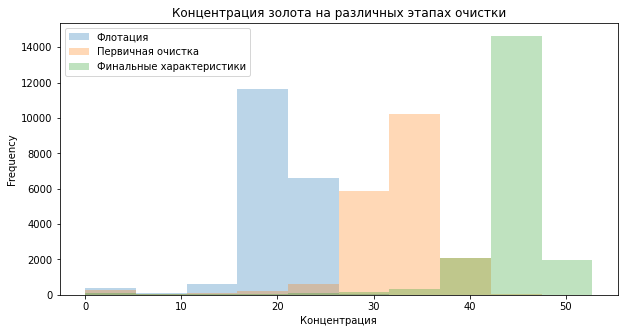

In [13]:
#строим гистограмму для концентрации золота на каждом из этапов очистки
ax = data_full[['rougher.output.concentrate_au',
               'primary_cleaner.output.concentrate_au',
               'final.output.concentrate_au']].plot(figsize=(10,5),
                                                    kind='hist',
                                                    alpha=0.3,
                                                    title='Концентрация золота на различных этапах очистки')
ax.set(xlabel='Концентрация')
plt.legend(['Флотация', 'Первичная очистка', 'Финальные характеристики']);

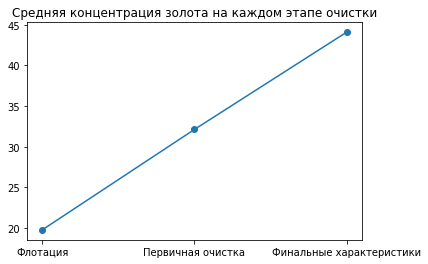

In [14]:
#график зависимости средней концентрации золота от этапа
ax = plt.plot(['Флотация',
              'Первичная очистка',
              'Финальные характеристики'], [data_full['rougher.output.concentrate_au'].mean(),
                                            data_full['primary_cleaner.output.concentrate_au'].mean(),
                                            data_full['final.output.concentrate_au'].mean()], 'o-')
plt.title('Средняя концентрация золота на каждом этапе очистки');

По полученным графикам видно, что на каждом этапе концентрация золота растет. Также можно заметить, что на каждом этапе есть значение концентрации 0, это значение можно считать аномальным.

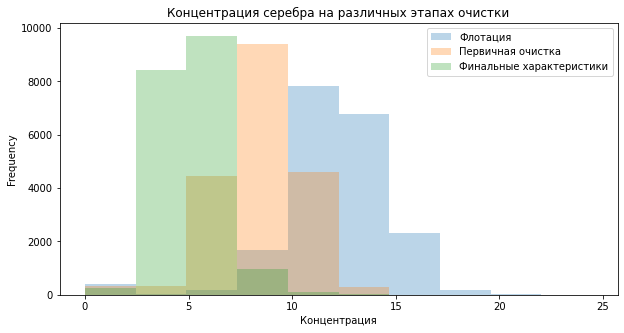

In [15]:
#строим гистограмму для концентрации серебра на каждом из этапов очистки
ax = data_full[['rougher.output.concentrate_ag',
               'primary_cleaner.output.concentrate_ag',
               'final.output.concentrate_ag']].plot(figsize=(10,5),
                                                    kind='hist',
                                                    alpha=0.3,
                                                    title='Концентрация серебра на различных этапах очистки')
ax.set(xlabel='Концентрация')
plt.legend(['Флотация', 'Первичная очистка', 'Финальные характеристики']);

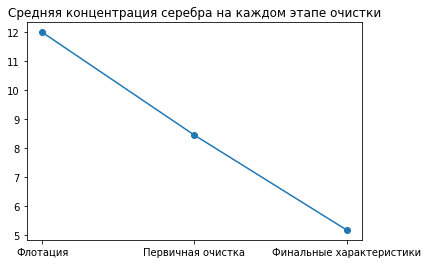

In [16]:
#график зависимости средней концентрации серебра от этапа
ax = plt.plot(['Флотация',
              'Первичная очистка',
              'Финальные характеристики'], [data_full['rougher.output.concentrate_ag'].mean(),
                                            data_full['primary_cleaner.output.concentrate_ag'].mean(),
                                            data_full['final.output.concentrate_ag'].mean()], 'o-')
plt.title('Средняя концентрация серебра на каждом этапе очистки');

По полученным графикам видно, что на каждом этапе концентрация серебра уменьшается. Также можно заметить, что на каждом этапе есть значение концентрации 0, это значение можно считать аномальным.

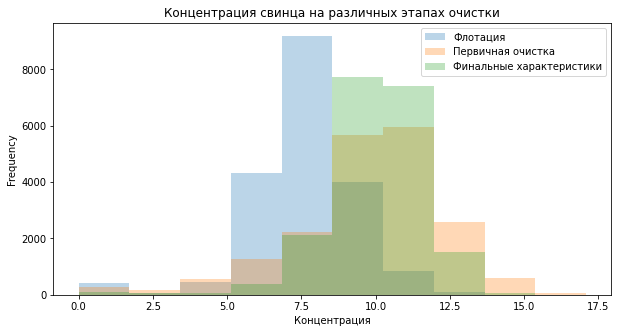

In [17]:
#строим гистограмму для концентрации свинца на каждом из этапов очистки
ax = data_full[['rougher.output.concentrate_pb',
               'primary_cleaner.output.concentrate_pb',
               'final.output.concentrate_pb']].plot(figsize=(10,5),
                                                    kind='hist',
                                                    alpha=0.3,
                                                    title='Концентрация свинца на различных этапах очистки')
ax.set(xlabel='Концентрация')
plt.legend(['Флотация', 'Первичная очистка', 'Финальные характеристики']);

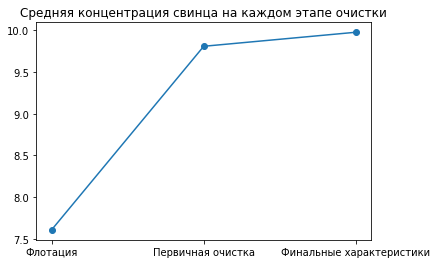

In [18]:
#график зависимости средней концентрации свинца от этапа
ax = plt.plot(['Флотация',
              'Первичная очистка',
              'Финальные характеристики'], [data_full['rougher.output.concentrate_pb'].mean(),
                                            data_full['primary_cleaner.output.concentrate_pb'].mean(),
                                            data_full['final.output.concentrate_pb'].mean()], 'o-')
plt.title('Средняя концентрация свинца на каждом этапе очистки');

По полученному графику видно, что концентрация на каждом из этапов находится примерно в одном диапазоне, но немного увеличивается с каждым этапом. Также можно заметить, что на каждом этапе есть значение концентрации 0, это значение можно считать аномальным.

### Сравнение распределения размеров гранул сырья на обучающей и тестовой выборках

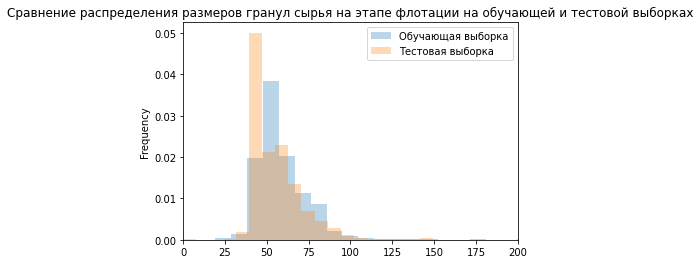

In [19]:
#распределение размеров гранул сырья на этапе флотации для обучающей и тестовой выборок
plt.xlim(0,200)
data_train['rougher.input.feed_size'].plot(kind='hist',
                                           bins=50,
                                           alpha=0.3, 
                                           density=True,
                                           title='Сравнение распределения размеров гранул сырья на этапе флотации на обучающей и тестовой выборках')
data_test['rougher.input.feed_size'].plot(kind='hist',
                                          bins=50,
                                          alpha=0.3, 
                                          density=True)
plt.legend(['Обучающая выборка', 'Тестовая выборка']);

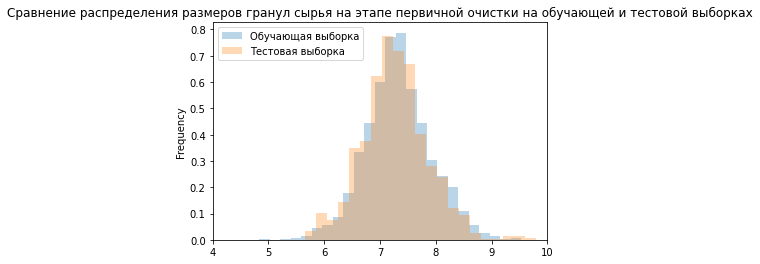

In [20]:
#распределение размеров гранул сырья на этапе первичной очистки для обучающей и тестовой выборок
plt.xlim(4,10)
data_train['primary_cleaner.input.feed_size'].plot(kind='hist',
                                              bins=50, 
                                              density=True,
                                              alpha=0.3,
                                              title='Сравнение распределения размеров гранул сырья на этапе первичной очистки на обучающей и тестовой выборках')
data_test['primary_cleaner.input.feed_size'].plot(kind='hist', 
                                                  bins=50, 
                                                  density=True,
                                                  alpha=0.3)
plt.legend(['Обучающая выборка', 'Тестовая выборка']);

И на этапе флотации, и на этапе первичной очистки для обучающей и тестовой выборок распределения размеров гранул сырья похожи.

### Исследование суммарной концентрации всех веществ на различных этапах

Исследуем суммарную концентрацию всех веществ на разных стадиях: в сырье, в черновом и финальном концентратах.

In [21]:
#суммарная концентрация веществ в сырье
data_rougher = data_full['rougher.input.feed_au'] + data_full['rougher.input.feed_ag'] + data_full['rougher.input.feed_pb']
#суммарная концентрация веществ в черновом концентрате
data_primary = data_full['rougher.output.concentrate_au'] + data_full['rougher.output.concentrate_ag'] + data_full['rougher.output.concentrate_pb']
#суммарная концентрация веществ в финальном концентрате
data_final = data_full['final.output.concentrate_au'] + data_full['final.output.concentrate_ag'] + data_full['final.output.concentrate_pb']

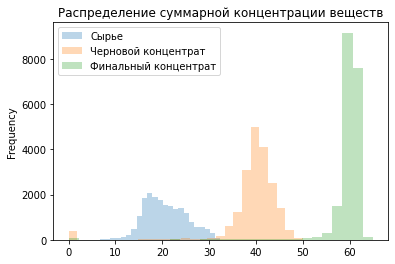

In [22]:
data_rougher.plot(kind='hist', alpha=0.3, bins=30, title='Распределение суммарной концентрации веществ')
data_primary.plot(kind='hist', alpha=0.3, bins=30)
data_final.plot(kind='hist', alpha=0.3, bins=30)
plt.legend(['Сырье', 'Черновой концентрат', 'Финальный концентрат']);

По графику можно заметить, что суммарная концентрация веществ с каждым этапом увеличивается. По графику можно заметить, что суммарная концентрация веществ иногда равна 0, что вряд ли возможно, удалим такие данные из выборок.

In [23]:
data_train = data_train[(data_train['rougher.input.feed_au'] > 0) & (data_train['rougher.input.feed_ag'] > 0) & (data_train['rougher.input.feed_pb'] > 0)]
data_test = data_test[(data_test['rougher.input.feed_au'] > 0) & (data_test['rougher.input.feed_ag'] > 0) & (data_test['rougher.input.feed_pb'] > 0)]
data_full = data_full[(data_full['rougher.input.feed_au'] > 0) & (data_full['rougher.input.feed_ag'] > 0) & (data_full['rougher.input.feed_pb'] > 0)]
data_full = data_full[(data_full['rougher.output.concentrate_au'] > 0) & (data_full['rougher.output.concentrate_ag'] > 0) & (data_full['rougher.output.concentrate_pb'] > 0)]
data_full = data_full[(data_full['final.output.concentrate_au'] > 0) & (data_full['final.output.concentrate_ag'] > 0) & (data_full['final.output.concentrate_pb'] > 0)]

### Вывод

1. Исследовано изменение концентрации металлов на различных этапах очистки, концентрация золота увеличивается с каждым этапом, концентрация серебра уменьшается, концентрация свинца немного увеличивается;
2. Распределения размеров гранул сырья на обучающей и тестовой выборках были сравнены, распределения одинаковы;
3. Исследована суммарная концентрация всех веществ в сырье, в черновом и финальном концентратах, с каждым этапом суммарная концентрация увеличивается.

## Модель

Напишем функцию для вычисления итоговой sMAPE.

In [24]:
#функция для вычисления sMAPE
def smape(target, predictions):
    return sum(abs(target - predictions) / ((abs(target) + abs(predictions)) / 2)) * 100 / len(target)

In [25]:
#функция для вычисления итоговой sMAPE
def final_smape(smape_rougher, smape_final):
    return 0.25 * smape_rougher + 0.75 * smape_final

Разделим обучающую и тестовую выборки на признаки и целевые признаки.

In [26]:
#разделение обучающей выборки на признаки и целевые признаки
features_train = data_train.drop(['rougher.output.recovery', 'final.output.recovery'], axis=1)
target_train_rougher = data_train['rougher.output.recovery']
target_train_final = data_train['final.output.recovery']

#разделение тестовой выборки на признаки и целевые признаки
features_test = data_test.drop(['rougher.output.recovery', 'final.output.recovery'], axis=1)
target_test_rougher = data_test['rougher.output.recovery']
target_test_final = data_test['final.output.recovery']

Приведем признаки к одному масштабу при помощи стандартизации данных.

In [27]:
#приведение признаков обучающей и тестовой выбоок к одному масштабу
scaler = StandardScaler()
scaler.fit(features_train)
features_train = scaler.transform(features_train)
features_test = scaler.transform(features_test)

Найдем лучшую модель, оценив каждую при помощи кросс-валидации.

* Дерево решений

In [28]:
#находим лучшую модель для эффективности обогащения чернового концентрата
model_dt_rougher = DecisionTreeRegressor(random_state=12345)

#подбираем лучшие гиперпараметры
param = {'max_depth': range(1,15,1)}
grid = RandomizedSearchCV(model_dt_rougher, param)
grid.fit(features_train, target_train_rougher)
best_model_dt_rougher = grid.best_estimator_

smape_scorer = make_scorer(smape, greater_is_better=False)
cross_val_score(best_model_dt_rougher, features_train, target_train_rougher, scoring=smape_scorer).mean()

-11.579887512182541

In [29]:
#находим лучшую модель для эффективности обогащения финального концентрата
model_dt_final = DecisionTreeRegressor(random_state=12345)

#подбираем лучшие гиперпараметры
param = {'max_depth': range(1,15,1)}
grid = RandomizedSearchCV(model_dt_final, param)
grid.fit(features_train, target_train_final)
best_model_dt_final = grid.best_estimator_

cross_val_score(best_model_dt_final, features_train, target_train_final, scoring=smape_scorer).mean()

-10.818607740325955

* Случайный лес

In [30]:
#находим лучшую модель для эффективности обогащения чернового концентрата
model_rf_rougher = RandomForestRegressor(random_state=12345)

#подбираем лучшие гиперпараметры
param = {'max_depth': range(1,15,1),
         'n_estimators':range(10,200,10)}
grid = RandomizedSearchCV(model_rf_rougher, param, n_iter=3)
grid.fit(features_train, target_train_rougher)
best_model_rf_rougher = grid.best_estimator_

cross_val_score(best_model_rf_rougher, features_train, target_train_rougher, scoring=smape_scorer).mean()

-11.126943915353243

In [31]:
#находим лучшую модель для эффективности обогащения финального концентрата
model_rf_final = RandomForestRegressor(random_state=12345)

#подбираем лучшие гиперпараметры
param = {'max_depth': range(1,15,1),
         'n_estimators':range(10,200,10)}
grid = RandomizedSearchCV(model_rf_final, param, n_iter=3)
grid.fit(features_train, target_train_final)
best_model_rf_final = grid.best_estimator_

cross_val_score(best_model_rf_final, features_train, target_train_final, scoring=smape_scorer).mean()

-10.303537982389175

* Линейная регрессия

In [32]:
#модель для эффективности обогащения чернового концентрата
model_lr_rougher = LinearRegression()
cross_val_score(model_lr_rougher, features_train, target_train_rougher, scoring=smape_scorer).mean()

-12.802483458481976

In [33]:
#модель для эффективности обогащения финального концентрата
model_lr_final = LinearRegression()
cross_val_score(model_lr_final, features_train, target_train_final, scoring=smape_scorer).mean()

-12.245300320302267

* CatBoost

In [34]:
#находим лучшую модель для эффективности обогащения чернового концентрата
model_cb_rougher = CatBoostRegressor(random_state=12345)

#подбираем лучшие гиперпараметры
param = {'depth': range(1,15,1),
         'iterations': range(10,100,10)}
grid = RandomizedSearchCV(model_cb_rougher, param, n_iter=3)
grid.fit(features_train, target_train_rougher)
best_model_cb_rougher = grid.best_estimator_

cross_val_score(best_model_cb_rougher, features_train, target_train_rougher, scoring=smape_scorer).mean()

Learning rate set to 0.5
0:	learn: 13.7934171	total: 52.2ms	remaining: 3.08s
1:	learn: 13.2904804	total: 60.5ms	remaining: 1.75s
2:	learn: 12.8796786	total: 67.5ms	remaining: 1.28s
3:	learn: 12.2783936	total: 73.9ms	remaining: 1.03s
4:	learn: 12.0438187	total: 79.3ms	remaining: 872ms
5:	learn: 11.8944660	total: 83.4ms	remaining: 751ms
6:	learn: 11.6566489	total: 87.7ms	remaining: 664ms
7:	learn: 11.5045477	total: 91.6ms	remaining: 595ms
8:	learn: 11.4380065	total: 95.5ms	remaining: 541ms
9:	learn: 11.2817291	total: 99.4ms	remaining: 497ms
10:	learn: 11.1434248	total: 103ms	remaining: 461ms
11:	learn: 11.0512494	total: 107ms	remaining: 429ms
12:	learn: 10.9777159	total: 111ms	remaining: 403ms
13:	learn: 10.9252887	total: 116ms	remaining: 380ms
14:	learn: 10.8934592	total: 120ms	remaining: 360ms
15:	learn: 10.8455896	total: 124ms	remaining: 341ms
16:	learn: 10.8206523	total: 129ms	remaining: 326ms
17:	learn: 10.7603484	total: 134ms	remaining: 312ms
18:	learn: 10.6907426	total: 139ms	rema

-11.959612553214736

In [35]:
#находим лучшую модель для эффективности обогащения финального концентрата
model_cb_final = CatBoostRegressor(random_state=12345)

#подбираем лучшие гиперпараметры
param = {'depth': range(1,15,1),
         'iterations': range(10,100,10)}
grid = RandomizedSearchCV(model_cb_final, param, n_iter=3)
grid.fit(features_train, target_train_final)
best_model_cb_final = grid.best_estimator_

cross_val_score(best_model_cb_final, features_train, target_train_final, scoring=smape_scorer).mean()

Learning rate set to 0.5
0:	learn: 8.6306246	total: 304ms	remaining: 21s
1:	learn: 7.8546815	total: 597ms	remaining: 20.3s
2:	learn: 7.3655359	total: 866ms	remaining: 19.3s
3:	learn: 7.0366781	total: 1.15s	remaining: 19s
4:	learn: 6.7954802	total: 1.49s	remaining: 19.3s
5:	learn: 6.5038113	total: 1.82s	remaining: 19.4s
6:	learn: 6.2949680	total: 2.13s	remaining: 19.2s
7:	learn: 6.1529740	total: 2.42s	remaining: 18.7s
8:	learn: 6.0225233	total: 2.76s	remaining: 18.7s
9:	learn: 5.9004054	total: 3.03s	remaining: 18.2s
10:	learn: 5.7915607	total: 3.3s	remaining: 17.7s
11:	learn: 5.6619606	total: 3.57s	remaining: 17.3s
12:	learn: 5.5095034	total: 3.85s	remaining: 16.9s
13:	learn: 5.4270086	total: 4.11s	remaining: 16.4s
14:	learn: 5.2880797	total: 4.38s	remaining: 16.1s
15:	learn: 5.1718809	total: 4.65s	remaining: 15.7s
16:	learn: 5.0799280	total: 4.9s	remaining: 15.3s
17:	learn: 4.9352744	total: 5.17s	remaining: 14.9s
18:	learn: 4.8761134	total: 5.45s	remaining: 14.6s
19:	learn: 4.7678903	t

-10.609919714817712

Лучший результат кросс-валидации для эффективности обогащения чернового и финального концентрата показали модели случайного леса. Проверим их на тестовой выборке.

In [36]:
predictions_rougher = best_model_rf_rougher.predict(features_test)
smape_rougher = smape(target_test_rougher, predictions_rougher)
print('sMAPE чернового концентрата:', round(smape_rougher, 2))

predictions_final = best_model_rf_final.predict(features_test)
smape_final = smape(target_test_final, predictions_final)
print('sMAPE финального концентрата:', round(smape_final, 2))

print('Итоговое sMAPE:', round(final_smape(smape_rougher, smape_final), 2))

sMAPE чернового концентрата: 10.36
sMAPE финального концентрата: 9.25
Итоговое sMAPE: 9.52


Сравним эти модели с константными.

In [37]:
dummy_rougher = DummyRegressor()
dummy_rougher.fit(features_train, target_train_rougher)
predictions_dummy_rougher = dummy_rougher.predict(features_test)
smape_dummy_rougher = smape(target_test_rougher, predictions_dummy_rougher)
print('sMAPE чернового концентрата:', round(smape_dummy_rougher, 2))

dummy_final = DummyRegressor()
dummy_final.fit(features_train, target_train_final)
predictions_dummy_final = dummy_final.predict(features_test)
smape_dummy_final = smape(target_test_final, predictions_dummy_final)
print('sMAPE финального концентрата:', round(smape_dummy_final, 2))

print('Итоговое sMAPE:', round(final_smape(smape_dummy_rougher, smape_dummy_final), 2))

sMAPE чернового концентрата: 10.38
sMAPE финального концентрата: 10.26
Итоговое sMAPE: 10.29


Показатели sMAPE чернового и финального концентрата и итоговое sMAPE у константных моделей больше, чем у наших моделей, что показывает, что предсказания наших моделей адекватны.

### Вывод

При помощи кросс-валидации было выяснено, что для предсказания эффективности обогащения чернового и финального концентрата лучше всего подходит модель случайного леса. Также были вычислены sMAPE чернового концентрата: 10.36, sMAPE финального концентрата: 9.25, итоговое sMAPE: 9.52. Также модели были сравнены с константными моделями, показатели sMAPE наших моделей меньше, чем у константных, что показывает адекватность наших моделей.

## Общий вывод

В ходе данной работы были изучены предоставленные файлы, проверена правильность расчета эффективности обогащения, проведена предобработка данных. Также:
* исследовано изменение концентрации металлов на различных этапах очистки, концентрация золота увеличивается с каждым этапом, концентрация серебра уменьшается, концентрация свинца немного увеличивается;
* распределения размеров гранул сырья на обучающей и тестовой выборках были сравнены, распределения одинаковы;
* исследована суммарная концентрация всех веществ в сырье, в черновом и финальном концентратах, с каждым этапом суммарная концентрация увеличивается.

Затем были выбраны лучшие модели при помощи кросс-валидации, для предсказания эффективности обогащения чернового и финального концентрата лучше всего подходит модель случайного леса. Также были вычислены sMAPE чернового концентрата: 10.36, sMAPE финального концентрата: 9.25, итоговое sMAPE: 9.52. Также модели были сравнены с константными моделями, показатели sMAPE наших моделей меньше, чем у константных, что показывает адекватность наших моделей.